In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from ast import literal_eval
import warnings
from matplotlib import pyplot
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("Modeldata.csv")

# Dropping columns


In [5]:
model_data = data.drop(["Title","Vote Count","Status","Vote Average"],axis=1)

# Feature Engineering


In [6]:
model_data["Release Year"] = 2021 - model_data["Release Year"] 

# Normalization

In [7]:
scalar = MinMaxScaler()

In [8]:
scalar.fit(model_data[["Budget"]])
model_data["Budget"] = scalar.transform(model_data[["Budget"]])

In [9]:
scalar.fit(model_data[["Revenue"]])
model_data["Revenue"] = scalar.transform(model_data[["Revenue"]])

In [10]:
scalar.fit(model_data[["Runtime"]])
model_data["Runtime"] = scalar.transform(model_data[["Runtime"]])

In [11]:
model_data

,IMDB_id,Budget,Revenue,Runtime,Language,Country,Certificate,Rating,Release Year,Genre1
0,tt0114709,0.099970,0.179155,0.092391,English,United States,G,8.3,26,Animation
1,tt0113497,0.216641,0.119375,0.217391,English,United States,PG,7.0,26,Adventure
2,tt0113277,0.199973,0.085135,0.576087,English,United States,R,8.2,26,Action
3,tt0113189,0.199973,0.159968,0.358696,English,United States,PG-13,7.2,26,Adventure
4,tt0112641,0.173306,0.052739,0.619565,English,France,R,8.2,26,Drama
...,...,...,...,...,...,...,...,...,...,...
808,tt0374298,0.013300,0.008412,0.358696,Russian,Bulgaria,NaN,7.0,16,NaN
809,tt0270288,0.099970,0.014995,0.266304,English,Canada,R,7.0,19,NaN
810,tt0498505,0.016634,0.003770,0.288043,Japanese,Japan,NaN,7.3,15,NaN
811,tt0221809,0.000967,0.000067,0.201087,English,Germany,Not Rated,7.6,20,NaN


# Dummy coding

In [12]:
temp_dummy = pd.get_dummies(model_data)

# Dimention Reduction

In [13]:
temp_dummy_final = temp_dummy[["Runtime","Rating","Release Year","Language_English","Language_French","Genre1_Drama","Genre1_Comedy","Certificate_R","Certificate_PG","Certificate_PG-13","Country_United States","Country_United Kingdom","Country_Germany","Country_France","Country_Japan","Country_Canada","Genre1_Adventure","Genre1_Action","Genre1_Crime","Genre1_Horror"]]

# Adding constant

In [14]:
temp_dummy_final['constant']=1

# Model Building

In [15]:

mod = sm.OLS(temp_dummy_final["Rating"],temp_dummy_final.drop("Rating",axis=1))

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']

In [16]:
fii.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                 OLS               Adj. R-squared:      0.167   
Dependent Variable:    Rating            AIC:                 891.4343
Date:                  2021-10-03 17:03  BIC:                 985.4489
No. Observations:      813               Log-Likelihood:      -425.72 
Df Model:              19                F-statistic:         9.546   
Df Residuals:          793               Prob (F-statistic):  2.63e-25
R-squared:             0.186             Scale:               0.17107 
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Runtime                 0.8183   0.1105  7.4044 0.0000  0.6013  1.0352
Release Year            0.0071   0.0010  6.9840 0.0000  0.0051  0.0091
Language_English       -0.1659   0.0641 -2.5900 0.0098 -0.2916 -0.0402
Language_French        -0.1793   0.1037 -1.7300 0.0840 -0.3828  0.0242
Genre1_Drama            0.1112   0.0407  2.7336 0.0064  0.0313  0.1910
Genre1_Comedy           0.0082   0.0513  0.1599 0.8730 -0.0925  0.1089
Certificate_R           0.0645   0.0478  1.3512 0.1770 -0.0292  0.1583
Certificate_PG          0.0086   0.0557  0.1550 0.8769 -0.1007  0.1180
Certificate_PG-13       0.0195   0.0564  0.3468 0.7288 -0.0911  0.1302
Country_United States  -0.0048   0.0509 -0.0941 0.9250 -0.1046  0.0950
Country_United Kingdom -0.0979   0.0688 -1.4237 0.1549 -0.2328  0.0371
Country_Germany        -0.1141   0.0803 -1.4212 0.1556 -0.2717  0.0435
Country_France         -0.1377   0.0859 -1.6036 0.1092 -0.3064  0.0309
Country_Japan           0.0403   0.0936  0.4300 0.6673 -0.1435  0.2241
Country_Canada         -0.0484   0.1064 -0.4553 0.6490 -0.2573  0.1604
Genre1_Adventure        0.0930   0.0613  1.5164 0.1298 -0.0274  0.2133
Genre1_Action          -0.0046   0.0612 -0.0757 0.9397 -0.1247  0.1155
Genre1_Crime            0.0907   0.0657  1.3805 0.1678 -0.0383  0.2196
Genre1_Horror           0.0301   0.0862  0.3498 0.7266 -0.1390  0.1993
constant                7.2342   0.0760 95.1983 0.0000  7.0850  7.3833
----------------------------------------------------------------------
Omnibus:               43.883         Durbin-Watson:            1.825 
Prob(Omnibus):         0.000          Jarque-Bera (JB):         49.664
Skew:                  0.580          Prob(JB):                 0.000 
Kurtosis:              3.345          Condition No.:            342   
======================================================================

"""

In [17]:
p_value = pd.DataFrame(fii.summary2().tables[1]['P>|t|'])

In [18]:
p_value.reset_index(inplace=True)


In [19]:
p_value.rename(columns={'P>|t|':'p_value'},inplace=True)

In [20]:
p_value = p_value[p_value["p_value"]<0.05].copy()

In [21]:
co_ef = pd.DataFrame(fii.summary2().tables[1]['Coef.'])

In [22]:
co_ef.reset_index(inplace=True)

In [23]:
final_matrix = p_value.merge(co_ef,how="inner",on="index")

# P_values with significant variables

In [24]:
final_matrix

,index,p_value,Coef.
0,Runtime,3.369832e-13,0.818271
1,Release Year,6.073147e-12,0.007126
2,Language_English,9.774191e-03,-0.165890
3,Genre1_Drama,6.404490e-03,0.111172
4,constant,0.000000e+00,7.234169


In [25]:
model_dataframe=[]
model_dataframe = pd.DataFrame(model_dataframe)

In [26]:
model_dataframe["variables"] = final_matrix["index"]
model_dataframe["Coef"] = final_matrix["Coef."]

In [27]:
model_dataframe

,variables,Coef
0,Runtime,0.818271
1,Release Year,0.007126
2,Language_English,-0.165890
3,Genre1_Drama,0.111172
4,constant,7.234169


# Plotting graph

In [28]:
sns.set_style("whitegrid")

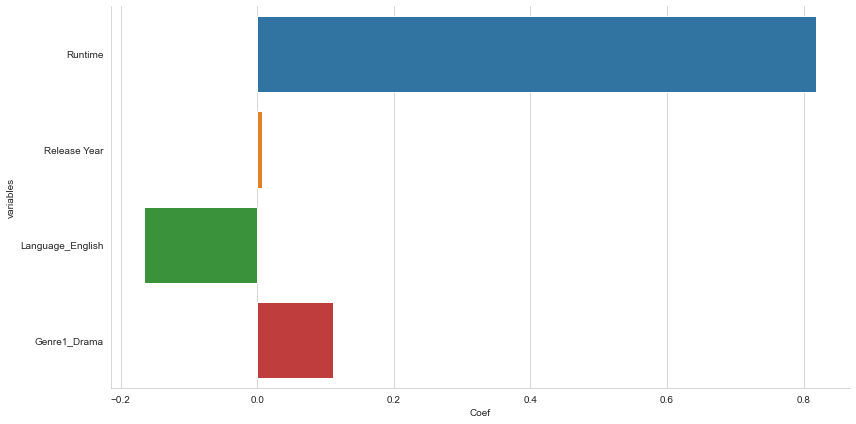

In [29]:
sns.catplot(x="Coef", y='variables', height=6,aspect=2    ,kind='bar', data=model_dataframe[model_dataframe['variables']!='constant'])

# Making model with actors and directors

In [30]:
data = pd.read_csv("Data.csv")

In [31]:
data_credits = pd.read_csv("credits.csv")

In [32]:
data_movies_metadata = pd.read_csv("movies_metadata.csv")

In [33]:
data_movies_metadata.drop_duplicates(subset="id",inplace=True,ignore_index=True)

In [34]:
data_credits.drop_duplicates(subset="id",inplace=True,ignore_index=True)

In [35]:
data.drop_duplicates(subset="IMDB_id",ignore_index=True,inplace=True)

In [36]:
data_movies_metadata = data_movies_metadata[data_movies_metadata["imdb_id"]!="0"]

In [37]:
data_model = data.merge(data_movies_metadata[["imdb_id","id"]],how="inner",left_on="IMDB_id",right_on="imdb_id")

In [38]:
data_model.drop("imdb_id",axis=1,inplace=True)

In [39]:
data_credits["id"] = data_credits["id"].astype("str")

In [40]:
model_data = data_model.merge(data_credits,how = "inner",on="id")

# getting director


In [41]:
model_data["crew"] = model_data["crew"].apply(literal_eval)

In [42]:
def get_director(a):
    for i in a:
        try:
            if i["job"] == "Director":
                return i["name"]
        except:
            return np.nan
        

In [43]:
temp_director = model_data["crew"].apply(get_director)
temp_director

0        John Lasseter
1         Joe Johnston
2         Michael Mann
3      Martin Campbell
4      Martin Scorsese
            ...       
807       Joseph Losey
808    Dzhanik Fayziev
809    Takashi Koizumi
810          Pan Nalin
811        Kunal Kohli
Name: crew, Length: 812, dtype: object

In [44]:
director_name = pd.DataFrame(temp_director)

In [45]:
director_name = director_name.rename(columns={"crew":"Director"})

In [46]:
model_data["Director"] = director_name["Director"]

# Getting Actors

In [47]:
model_data["cast"] = model_data["cast"].apply(literal_eval)

In [48]:
def get_actor(a):
    
    Actor1 = []
    try:
        Actor1.append(a[0]["name"])
    except:
        Actor1.append(np.nan)
    try:
        Actor1.append(a[1]["name"])
    except:
        Actor1.append(np.nan)
    try:
        Actor1.append(a[2]["name"])
    except:
        Actor1.append(np.nan)
    return Actor1

In [49]:
temp_actor = model_data["cast"].apply(get_actor)

In [50]:
temp_actor = pd.DataFrame(temp_actor)

In [51]:
Actor_name = pd.DataFrame(temp_actor["cast"].to_list(),columns = ["Actor1","Actor2","Actor3"])
model_data["Actor1"]= Actor_name["Actor1"]
model_data["Actor2"]= Actor_name["Actor2"]
model_data["Actor3"]= Actor_name["Actor3"]

In [52]:
actor1_df = pd.DataFrame(model_data["Actor1"].value_counts()).reset_index()

In [53]:
actor2_df = pd.DataFrame(model_data["Actor2"].value_counts()).reset_index()
actor3_df= pd.DataFrame(model_data["Actor3"].value_counts()).reset_index()

In [54]:
actors = actor1_df.merge(actor2_df,how="outer",on="index")

In [55]:
actors = actors.merge(actor3_df,how="outer",on="index")

In [56]:
actors.fillna(0,inplace=True)

In [57]:
actors["counts"] = actors["Actor1"] + actors["Actor2"] +actors["Actor3"] 

In [58]:
actors.drop(["Actor1","Actor2","Actor3"],axis = 1, inplace=True)


In [59]:
actors.sort_values("counts",ascending=False,ignore_index=True,inplace=True)

In [60]:
top_5_act=list(actors.iloc[:5,0])

In [61]:
def act(a,b,c,d):
    d={i:[] for i in d}
    for i in d:
        for j,k,l in zip(a,b,c):
            if(i in [j,k,l]):
                d[i].append(1)
            else:
                d[i].append(0)
    return d

temp_dict=act(list(model_data['Actor1']),list(model_data['Actor2']),list(model_data['Actor3']),top_5_act)
dummy_actor=pd.DataFrame(temp_dict)
model_data=model_data.join(dummy_actor)

In [62]:
top_5_direc=list(model_data['Director'].value_counts().index[:5])

In [63]:
def direc(a,d):
    d={i:[] for i in d}
    for i in d:
        for j in a:
            if(i==j):
                d[i].append(1)
            else:
                d[i].append(0)
    return d

temp_dict=direc(list(model_data['Director']),top_5_direc)
dummy_direc=pd.DataFrame(temp_dict)
model_data=model_data.join(dummy_direc)

# model preparation# 

In [64]:
b=model_data[['Rating','Robert De Niro',
'Brad Pitt',
'Johnny Depp',
'Tom Hanks',
'Tom Cruise',
'Alfred Hitchcock',
'Steven Spielberg',
'Stanley Kubrick',
'Tim Burton',
'Martin Scorsese']].copy()

In [65]:
mod = sm.OLS(b["Rating"],b.drop("Rating",axis=1))

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']

In [66]:
p_value = pd.DataFrame(fii.summary2().tables[1]['P>|t|'])
p_value

,P>|t|
Robert De Niro,0.002943
Brad Pitt,0.000245
Johnny Depp,0.004575
Tom Hanks,0.009816
Tom Cruise,0.018559
Alfred Hitchcock,0.000013
Steven Spielberg,0.001002
Stanley Kubrick,0.000475
Tim Burton,0.063226
Martin Scorsese,0.255121


In [67]:
p_value.reset_index(inplace=True)


In [68]:
p_value.rename(columns={'P>|t|':'p_value'},inplace=True)

In [69]:
p_value = p_value[p_value["p_value"]<0.05].copy()

In [70]:
co_ef = pd.DataFrame(fii.summary2().tables[1]['Coef.'])

In [71]:
co_ef.reset_index(inplace=True)

In [72]:
final_matrix = p_value.merge(co_ef,how="inner",on="index")

In [73]:
final_matrix

,index,p_value,Coef.
0,Robert De Niro,0.002943,6.042005
1,Brad Pitt,0.000245,6.850378
2,Johnny Depp,0.004575,6.076238
3,Tom Hanks,0.009816,6.044730
4,Tom Cruise,0.018559,5.402318
5,Alfred Hitchcock,0.000013,7.843750
6,Steven Spielberg,0.001002,6.317566
7,Stanley Kubrick,0.000475,7.608880


In [74]:
Actors_dataframe = []

In [75]:
Actors_dataframe = pd.DataFrame(Actors_dataframe)

In [76]:
Actors_dataframe["Actor_name"] = final_matrix["index"]

In [77]:
Actors_dataframe["Coef"] = final_matrix["Coef."]-5

In [78]:
Actors_dataframe

,Actor_name,Coef
0,Robert De Niro,1.042005
1,Brad Pitt,1.850378
2,Johnny Depp,1.076238
3,Tom Hanks,1.044730
4,Tom Cruise,0.402318
5,Alfred Hitchcock,2.843750
6,Steven Spielberg,1.317566
7,Stanley Kubrick,2.608880


In [79]:
sns.set_style("whitegrid")

# Model Output


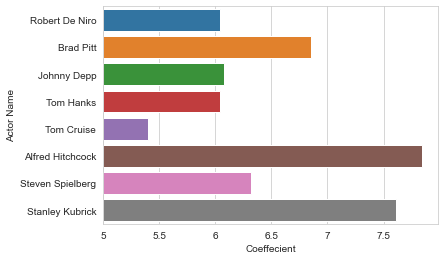

In [80]:
ax=sns.barplot(data=Actors_dataframe,x="Coef",y='Actor_name')
ax.set_xticklabels([5,5.5,6,6.5,7,7.5])
plt.xlabel("Coeffecient")
plt.ylabel("Actor Name")
plt.show()